In [59]:
import pandas as pd
pd.options.display.max_columns = 500
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [46]:
column_names = []

column_names.append('type')
column_names.append('ethyl')
column_names.append('methonal')
column_names.append('glycerol')
column_names.append('propanol')
column_names.append('coumarin')
column_names.append('citric_acid')
column_names.append('acetaldehyde')
column_names.append('isoamyl_alcohol')
column_names.append('impurities')
for i in range(90):
    column_names.append('add_ingredient'+str(i))
print(len(column_names))
column_names

100


['type',
 'ethyl',
 'methonal',
 'glycerol',
 'propanol',
 'coumarin',
 'citric_acid',
 'acetaldehyde',
 'isoamyl_alcohol',
 'impurities',
 'add_ingredient0',
 'add_ingredient1',
 'add_ingredient2',
 'add_ingredient3',
 'add_ingredient4',
 'add_ingredient5',
 'add_ingredient6',
 'add_ingredient7',
 'add_ingredient8',
 'add_ingredient9',
 'add_ingredient10',
 'add_ingredient11',
 'add_ingredient12',
 'add_ingredient13',
 'add_ingredient14',
 'add_ingredient15',
 'add_ingredient16',
 'add_ingredient17',
 'add_ingredient18',
 'add_ingredient19',
 'add_ingredient20',
 'add_ingredient21',
 'add_ingredient22',
 'add_ingredient23',
 'add_ingredient24',
 'add_ingredient25',
 'add_ingredient26',
 'add_ingredient27',
 'add_ingredient28',
 'add_ingredient29',
 'add_ingredient30',
 'add_ingredient31',
 'add_ingredient32',
 'add_ingredient33',
 'add_ingredient34',
 'add_ingredient35',
 'add_ingredient36',
 'add_ingredient37',
 'add_ingredient38',
 'add_ingredient39',
 'add_ingredient40',
 'add_ingr

In [228]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=5, n_features=100, center_box=(1,10), cluster_std=0.5, random_state=4534)

df = pd.DataFrame(X,columns=column_names)
df['type'] = y
column_mapping = {0:'vodka',1:'rum',2:'whiskey',3:'brandy',4:'gin'}
colors = {'vodka':'red', 'rum':'blue', 'whiskey':'green', 'brandy':'yellow', 'gin':'purple'}
df.replace({"type": column_mapping},inplace=True)

df.to_csv('Synthetic_Formula_Data.csv')

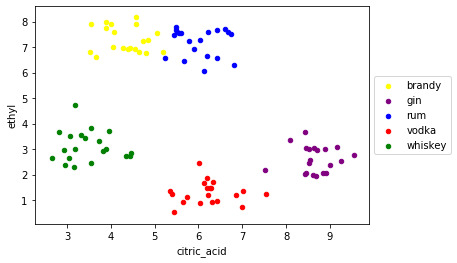

In [229]:
df = pd.read_csv('Synthetic_Formula_Data.csv')

# scatter plot, dots colored by class value
fig, ax = plt.subplots()
grouped = df.groupby('type')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='citric_acid', y='ethyl', label=key, color=colors[key])
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [245]:
fraud_df = pd.read_csv('Synthetic_Formula_Data_Fraud.csv')
fraud_df['type'].value_counts()

brandy         20
rum            20
gin            20
whiskey        20
vodka          19
vodka_fraud     1
Name: type, dtype: int64

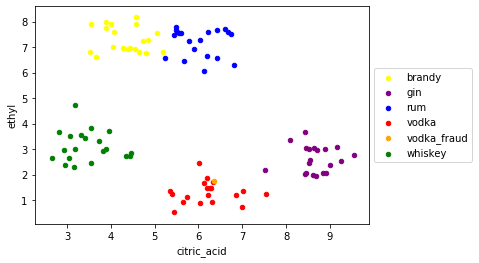

In [246]:
# scatter plot, dots colored by class value
colors = {'vodka':'red', 'vodka_fraud':'orange', 'rum':'blue', 'whiskey':'green', 'brandy':'yellow', 'gin':'purple'}
fig, ax = plt.subplots()
grouped = fraud_df.groupby('type')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='citric_acid', y='ethyl', label=key, color=colors[key])
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

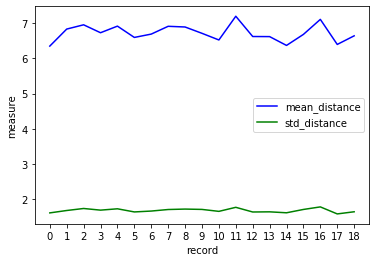

In [254]:
from scipy.spatial.distance import pdist, squareform
import statistics 

only_vodka_df = fraud_df[fraud_df['type']=='vodka']
only_vodka_df.drop('type',axis=1,inplace=True)
only_vodka_df.drop('Unnamed: 0',axis=1,inplace=True)

distances = pdist(only_vodka_df.values, metric='euclidean')
dist_matrix = squareform(distances)

mean_dist = []
std_dist = []

for row in dist_matrix:
    mean_dist.append(statistics.mean(row))
    std_dist.append(statistics.stdev(row))

xi=list(range(len(mean_dist)))
plt.plot(xi,mean_dist,'b',label='mean_distance')
plt.plot(std_dist,'g',label='std_distance')
plt.xlabel('record')
plt.ylabel('measure')
plt.xticks(xi)
plt.legend()
plt.show()

In [252]:
only_vodka_df = fraud_df[(fraud_df['type']=='vodka')]
only_vodka_df.drop('type',axis=1,inplace=True)
only_vodka_df.drop('Unnamed: 0',axis=1,inplace=True)
only_vodka_df.head(50)

/Users/jscearce/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ethyl,methonal,glycerol,propanol,coumarin,citric_acid,acetaldehyde,isoamyl_alcohol,impurities,add_ingredient0,add_ingredient1,add_ingredient2,add_ingredient3,add_ingredient4,add_ingredient5,add_ingredient6,add_ingredient7,add_ingredient8,add_ingredient9,add_ingredient10,add_ingredient11,add_ingredient12,add_ingredient13,add_ingredient14,add_ingredient15,add_ingredient16,add_ingredient17,add_ingredient18,add_ingredient19,add_ingredient20,add_ingredient21,add_ingredient22,add_ingredient23,add_ingredient24,add_ingredient25,add_ingredient26,add_ingredient27,add_ingredient28,add_ingredient29,add_ingredient30,add_ingredient31,add_ingredient32,add_ingredient33,add_ingredient34,add_ingredient35,add_ingredient36,add_ingredient37,add_ingredient38,add_ingredient39,add_ingredient40,add_ingredient41,add_ingredient42,add_ingredient43,add_ingredient44,add_ingredient45,add_ingredient46,add_ingredient47,add_ingredient48,add_ingredient49,add_ingredient50,add_ingredient51,add_ingredient52,add_ingredient53,add_ingredient54,add_ingredient55,add_ingredient56,add_ingredient57,add_ingredient58,add_ingredient59,add_ingredient60,add_ingredient61,add_ingredient62,add_ingredient63,add_ingredient64,add_ingredient65,add_ingredient66,add_ingredient67,add_ingredient68,add_ingredient69,add_ingredient70,add_ingredient71,add_ingredient72,add_ingredient73,add_ingredient74,add_ingredient75,add_ingredient76,add_ingredient77,add_ingredient78,add_ingredient79,add_ingredient80,add_ingredient81,add_ingredient82,add_ingredient83,add_ingredient84,add_ingredient85,add_ingredient86,add_ingredient87,add_ingredient88,add_ingredient89
1,1.231358,6.428843,4.945032,8.952496,7.466016,5.403268,4.368392,3.513768,5.651697,5.428870,10.033345,5.776615,4.513156,7.880919,5.369267,7.750870,10.201095,4.894431,3.814177,6.268005,6.146037,6.360193,5.957428,7.202847,5.265605,4.765924,7.430371,1.887910,5.564425,5.585751,3.674267,2.260060,7.582618,2.381300,2.076604,7.272997,4.940796,8.075924,7.269596,3.347159,5.531118,6.599868,10.048530,8.720156,4.759862,3.253472,6.040972,4.140741,3.273521,6.926325,2.228734,3.455799,6.829842,2.952910,8.453050,4.839993,7.918431,3.188236,6.327462,4.475240,3.062116,2.204684,5.603416,3.766021,2.478103,10.759461,3.566791,5.550692,5.180300,6.338052,3.092009,1.633212,1.222031,5.386954,6.083333,3.199772,9.881765,9.877490,1.652166,3.141881,5.489931,8.736472,1.466623,4.542311,5.517185,7.992703,9.275636,4.433097,3.111361,5.480352,5.325044,8.686908,6.138333,4.374579,0.676332,8.533143,9.121663,10.130950,8.164040
4,1.221443,6.209352,4.813055,9.017512,8.258641,6.851278,3.640145,3.273949,5.389581,4.299076,9.432852,5.296744,5.013212,8.375449,6.224161,8.708256,9.468971,5.787108,4.148875,6.140317,6.836366,5.867786,5.660791,8.024021,5.380766,3.258557,7.492192,1.386545,6.023639,4.957906,4.210995,3.348570,6.676626,1.919439,2.111812,7.296467,4.043271,7.443453,6.216029,3.197922,5.695395,6.569739,8.667478,9.337069,6.382488,3.406586,5.538845,4.344239,1.353523,6.691843,3.144387,3.830495,6.742676,4.617824,7.936679,4.603308,8.188103,3.009446,5.853635,4.755036,2.841079,2.902094,5.035471,4.079109,2.520439,9.449922,3.593554,5.448285,4.909162,5.544839,4.959802,0.427587,1.499657,5.190420,6.041113,1.843276,9.649354,9.814701,2.167209,4.371533,6.141361,9.888962,1.981927,3.546920,5.939506,7.502689,9.616786,4.398155,4.172326,5.244024,5.230147,9.498671,6.512294,3.202342,1.990708,7.799594,8.684796,7.942544,7.656209
6,2.465023,6.704541,5.436186,8.723696,7.627759,6.007766,4.440683,3.030143,6.254892,4.441869,10.045252,6.375942,5.478338,7.799687,5.903415,8.556991,10.485462,5.838370,3.220108,6.365016,7.824238,5.287687,6.607974,6.760487,5.047610,3.191008,7.500848,1.641365,5.867033,4.608633,3.664426,2.024878,7.624158,1.461949,1.871821,7.026930,5.102574,7.100583,7.071242,3.500903,5.293333,6.824755,9.925575,9.363715,5.998696,3.250803,5.642407,3.079514,1.583669,7.358868,2.592345,3.204080,6.127364,4.431525,8.258775,5.178512,7.862508,3.063575,6.812612,5.265027,3.533313,2.413271,4.707899,5.721908,1.316706,10.20

In [253]:
only_vodka_df_fraud = fraud_df[(fraud_df['type']=='vodka_fraud')]
only_vodka_df_fraud.drop('type',axis=1,inplace=True)
only_vodka_df_fraud.drop('Unnamed: 0',axis=1,inplace=True)
only_vodka_df_fraud.head(50)

,ethyl,methonal,glycerol,propanol,coumarin,citric_acid,acetaldehyde,isoamyl_alcohol,impurities,add_ingredient0,add_ingredient1,add_ingredient2,add_ingredient3,add_ingredient4,add_ingredient5,add_ingredient6,add_ingredient7,add_ingredient8,add_ingredient9,add_ingredient10,add_ingredient11,add_ingredient12,add_ingredient13,add_ingredient14,add_ingredient15,add_ingredient16,add_ingredient17,add_ingredient18,add_ingredient19,add_ingredient20,add_ingredient21,add_ingredient22,add_ingredient23,add_ingredient24,add_ingredient25,add_ingredient26,add_ingredient27,add_ingredient28,add_ingredient29,add_ingredient30,add_ingredient31,add_ingredient32,add_ingredient33,add_ingredient34,add_ingredient35,add_ingredient36,add_ingredient37,add_ingredient38,add_ingredient39,add_ingredient40,add_ingredient41,add_ingredient42,add_ingredient43,add_ingredient44,add_ingredient45,add_ingredient46,add_ingredient47,add_ingredient48,add_ingredient49,add_ingredient50,add_ingredient51,add_ingredient52,add_ingredient53,add_ingredient54,add_ingredient55,add_ingredient56,add_ingredient57,add_ingredient58,add_ingredient59,add_ingredient60,add_ingredient61,add_ingredient62,add_ingredient63,add_ingredient64,add_ingredient65,add_ingredient66,add_ingredient67,add_ingredient68,add_ingredient69,add_ingredient70,add_ingredient71,add_ingredient72,add_ingredient73,add_ingredient74,add_ingredient75,add_ingredient76,add_ingredient77,add_ingredient78,add_ingredient79,add_ingredient80,add_ingredient81,add_ingredient82,add_ingredient83,add_ingredient84,add_ingredient85,add_ingredient86,add_ingredient87,add_ingredient88,add_ingredient89
70,1.736963,6.682399,4.117726,9.078422,7.904694,6.351233,4.59668,3.781346,5.715287,4.920989,9.250842,5.61732,4.652988,6.591961,5.550353,7.441515,9.429696,4.657797,3.087487,6.201816,5.747094,6.767566,5.676859,6.769689,5.19514,3.965105,6.966474,2.005632,5.318162,4.353009,3.867341,2.96292,7.715566,2.242328,2.229222,7.139462,5.165068,7.645606,7.460824,3.212312,5.443687,6.191949,10.702343,9.284247,4.676533,3.258304,5.19325,4.646365,2.024731,6.927423,2.949483,3.986958,6.235565,3.661122,8.845903,4.841155,8.099787,2.592639,7.226402,4.875247,2.855799,3.096321,4.150443,4.634257,0.549293,10.015111,3.839015,6.149753,4.347078,6.876315,3.699107,0.635418,1.651968,5.482817,5.270089,3.028199,9.449424,9.751247,1.921698,3.132453,5.634719,9.705037,2.894349,3.984272,6.219549,7.843336,10.633569,3.48404,3.400678,4.833058,5.559638,9.090819,5.433402,3.418614,0.854904,8.191004,8.357922,9.320491,8.433781


In [299]:
only_vodka_df_all = pd.concat([only_vodka_df,only_vodka_df_fraud])
only_vodka_df_all.head(50)

,ethyl,methonal,glycerol,propanol,coumarin,citric_acid,acetaldehyde,isoamyl_alcohol,impurities,add_ingredient0,add_ingredient1,add_ingredient2,add_ingredient3,add_ingredient4,add_ingredient5,add_ingredient6,add_ingredient7,add_ingredient8,add_ingredient9,add_ingredient10,add_ingredient11,add_ingredient12,add_ingredient13,add_ingredient14,add_ingredient15,add_ingredient16,add_ingredient17,add_ingredient18,add_ingredient19,add_ingredient20,add_ingredient21,add_ingredient22,add_ingredient23,add_ingredient24,add_ingredient25,add_ingredient26,add_ingredient27,add_ingredient28,add_ingredient29,add_ingredient30,add_ingredient31,add_ingredient32,add_ingredient33,add_ingredient34,add_ingredient35,add_ingredient36,add_ingredient37,add_ingredient38,add_ingredient39,add_ingredient40,add_ingredient41,add_ingredient42,add_ingredient43,add_ingredient44,add_ingredient45,add_ingredient46,add_ingredient47,add_ingredient48,add_ingredient49,add_ingredient50,add_ingredient51,add_ingredient52,add_ingredient53,add_ingredient54,add_ingredient55,add_ingredient56,add_ingredient57,add_ingredient58,add_ingredient59,add_ingredient60,add_ingredient61,add_ingredient62,add_ingredient63,add_ingredient64,add_ingredient65,add_ingredient66,add_ingredient67,add_ingredient68,add_ingredient69,add_ingredient70,add_ingredient71,add_ingredient72,add_ingredient73,add_ingredient74,add_ingredient75,add_ingredient76,add_ingredient77,add_ingredient78,add_ingredient79,add_ingredient80,add_ingredient81,add_ingredient82,add_ingredient83,add_ingredient84,add_ingredient85,add_ingredient86,add_ingredient87,add_ingredient88,add_ingredient89
1,1.231358,6.428843,4.945032,8.952496,7.466016,5.403268,4.368392,3.513768,5.651697,5.428870,10.033345,5.776615,4.513156,7.880919,5.369267,7.750870,10.201095,4.894431,3.814177,6.268005,6.146037,6.360193,5.957428,7.202847,5.265605,4.765924,7.430371,1.887910,5.564425,5.585751,3.674267,2.260060,7.582618,2.381300,2.076604,7.272997,4.940796,8.075924,7.269596,3.347159,5.531118,6.599868,10.048530,8.720156,4.759862,3.253472,6.040972,4.140741,3.273521,6.926325,2.228734,3.455799,6.829842,2.952910,8.453050,4.839993,7.918431,3.188236,6.327462,4.475240,3.062116,2.204684,5.603416,3.766021,2.478103,10.759461,3.566791,5.550692,5.180300,6.338052,3.092009,1.633212,1.222031,5.386954,6.083333,3.199772,9.881765,9.877490,1.652166,3.141881,5.489931,8.736472,1.466623,4.542311,5.517185,7.992703,9.275636,4.433097,3.111361,5.480352,5.325044,8.686908,6.138333,4.374579,0.676332,8.533143,9.121663,10.130950,8.164040
4,1.221443,6.209352,4.813055,9.017512,8.258641,6.851278,3.640145,3.273949,5.389581,4.299076,9.432852,5.296744,5.013212,8.375449,6.224161,8.708256,9.468971,5.787108,4.148875,6.140317,6.836366,5.867786,5.660791,8.024021,5.380766,3.258557,7.492192,1.386545,6.023639,4.957906,4.210995,3.348570,6.676626,1.919439,2.111812,7.296467,4.043271,7.443453,6.216029,3.197922,5.695395,6.569739,8.667478,9.337069,6.382488,3.406586,5.538845,4.344239,1.353523,6.691843,3.144387,3.830495,6.742676,4.617824,7.936679,4.603308,8.188103,3.009446,5.853635,4.755036,2.841079,2.902094,5.035471,4.079109,2.520439,9.449922,3.593554,5.448285,4.909162,5.544839,4.959802,0.427587,1.499657,5.190420,6.041113,1.843276,9.649354,9.814701,2.167209,4.371533,6.141361,9.888962,1.981927,3.546920,5.939506,7.502689,9.616786,4.398155,4.172326,5.244024,5.230147,9.498671,6.512294,3.202342,1.990708,7.799594,8.684796,7.942544,7.656209
6,2.465023,6.704541,5.436186,8.723696,7.627759,6.007766,4.440683,3.030143,6.254892,4.441869,10.045252,6.375942,5.478338,7.799687,5.903415,8.556991,10.485462,5.838370,3.220108,6.365016,7.824238,5.287687,6.607974,6.760487,5.047610,3.191008,7.500848,1.641365,5.867033,4.608633,3.664426,2.024878,7.624158,1.461949,1.871821,7.026930,5.102574,7.100583,7.071242,3.500903,5.293333,6.824755,9.925575,9.363715,5.998696,3.250803,5.642407,3.079514,1.583669,7.358868,2.592345,3.204080,6.127364,4.431525,8.258775,5.178512,7.862508,3.063575,6.812612,5.265027,3.533313,2.413271,4.707899,5.721908,1.316706,10.20

In [300]:
feature_list = only_vodka_df_all.values.tolist()
display(len(feature_list))

20

,ethyl,methonal,glycerol,propanol,coumarin,citric_acid,acetaldehyde,isoamyl_alcohol,impurities,add_ingredient0,add_ingredient1,add_ingredient2,add_ingredient3,add_ingredient4,add_ingredient5,add_ingredient6,add_ingredient7,add_ingredient8,add_ingredient9,add_ingredient10,add_ingredient11,add_ingredient12,add_ingredient13,add_ingredient14,add_ingredient15,add_ingredient16,add_ingredient17,add_ingredient18,add_ingredient19,add_ingredient20,add_ingredient21,add_ingredient22,add_ingredient23,add_ingredient24,add_ingredient25,add_ingredient26,add_ingredient27,add_ingredient28,add_ingredient29,add_ingredient30,add_ingredient31,add_ingredient32,add_ingredient33,add_ingredient34,add_ingredient35,add_ingredient36,add_ingredient37,add_ingredient38,add_ingredient39,add_ingredient40,add_ingredient41,add_ingredient42,add_ingredient43,add_ingredient44,add_ingredient45,add_ingredient46,add_ingredient47,add_ingredient48,add_ingredient49,add_ingredient50,add_ingredient51,add_ingredient52,add_ingredient53,add_ingredient54,add_ingredient55,add_ingredient56,add_ingredient57,add_ingredient58,add_ingredient59,add_ingredient60,add_ingredient61,add_ingredient62,add_ingredient63,add_ingredient64,add_ingredient65,add_ingredient66,add_ingredient67,add_ingredient68,add_ingredient69,add_ingredient70,add_ingredient71,add_ingredient72,add_ingredient73,add_ingredient74,add_ingredient75,add_ingredient76,add_ingredient77,add_ingredient78,add_ingredient79,add_ingredient80,add_ingredient81,add_ingredient82,add_ingredient83,add_ingredient84,add_ingredient85,add_ingredient86,add_ingredient87,add_ingredient88,add_ingredient89
0,1.726963,6.672399,4.107726,9.068422,7.894694,6.341233,4.58668,3.771346,5.705287,4.910989,9.240842,5.60732,4.642988,6.581961,5.540353,7.431515,9.429696,4.657797,3.087487,6.201816,5.747094,6.767566,5.676859,6.769689,5.19514,3.965105,6.966474,2.005632,5.318162,4.353009,3.867341,2.96292,7.715566,2.242328,2.229222,7.139462,5.165068,7.645606,7.460824,3.212312,5.443687,6.191949,10.702343,9.284247,4.676533,3.258304,5.19325,4.646365,2.024731,6.927423,2.949483,3.986958,6.235565,3.661122,8.845903,4.841155,8.099787,2.592639,7.226402,4.875247,2.855799,3.096321,4.150443,4.634257,0.549293,10.015111,3.839015,6.149753,4.347078,6.876315,3.699107,0.635418,1.651968,5.482817,5.270089,3.028199,9.449424,9.751247,1.921698,3.132453,5.634719,9.705037,2.894349,3.984272,6.219549,7.843336,10.633569,3.48404,3.400678,4.833058,5.559638,9.090819,5.433402,3.418614,0.854904,8.191004,8.357922,9.320491,8.433781
0,1.736963,6.682399,4.117726,9.078422,7.904694,6.351233,4.59668,3.781346,5.715287,4.920989,9.250842,5.61732,4.652988,6.591961,5.550353,7.441515,9.429696,4.657797,3.087487,6.201816,5.747094,6.767566,5.676859,6.769689,5.19514,3.965105,6.966474,2.005632,5.318162,4.353009,3.867341,2.96292,7.715566,2.242328,2.229222,7.139462,5.165068,7.645606,7.460824,3.212312,5.443687,6.191949,10.702343,9.284247,4.676533,3.258304,5.19325,4.646365,2.024731,6.927423,2.949483,3.986958,6.235565,3.661122,8.845903,4.841155,8.099787,2.592639,7.226402,4.875247,2.855799,3.096321,4.150443,4.634257,0.549293,10.015111,3.839015,6.149753,4.347078,6.876315,3.699107,0.635418,1.651968,5.482817,5.270089,3.028199,9.449424,9.751247,1.921698,3.132453,5.634719,9.705037,2.894349,3.984272,6.219549,7.843336,10.633569,3.48404,3.400678,4.833058,5.559638,9.090819,5.433402,3.418614,0.854904,8.191004,8.357922,9.320491,8.433781


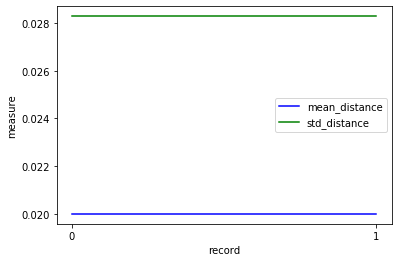

In [301]:
not_fraud = only_vodka_df_all.iloc[13]
fraud = only_vodka_df_all.iloc[19]

not_fraud = not_fraud.to_dict()
fraud = fraud.to_dict()

example_df1 = pd.DataFrame(not_fraud,index=[0])
example_df2 = pd.DataFrame(fraud,index=[0])
example_df = pd.concat([example_df1,example_df2])
display(example_df.head())

distances = pdist(example_df.values, metric='euclidean')
dist_matrix = squareform(distances)

mean_dist = []
std_dist = []

for row in dist_matrix:
    mean_dist.append(statistics.mean(row))
    std_dist.append(statistics.stdev(row))

xi=list(range(len(mean_dist)))
plt.plot(xi,mean_dist,'b',label='mean_distance')
plt.plot(std_dist,'g',label='std_distance')
plt.xlabel('record')
plt.ylabel('measure')
plt.xticks(xi)
plt.legend()
plt.show()